In [1]:
# Assignment 6 for Professor Wang's PM Data Science class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from numpy import set_printoptions

In [2]:
# 1. Load titanic data set
titanic_data = pd.read_csv("../titanic_data.csv", index_col='PassengerId')

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [3]:
# 2. Drop name, sex, ticket, cabin, embarked columns and drop all NAs
titanic_intermediary = titanic_data.drop(columns=['Name','Sex','Ticket','Cabin','Embarked']).dropna()

titanic_intermediary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [4]:
# 3. Check if there is a feature that has a constant column if there is one drop that column
titanic_intermediary.apply(pd.Series.nunique)

Survived      2
Pclass        3
Age          88
SibSp         6
Parch         7
Fare        220
dtype: int64

In [5]:
# 4. Find if there is a duplicated feature
titanic_intermediary.head() # no duplicate features

Survived  Pclass   Age  SibSp  Parch     Fare
PassengerId                                               
1                   0       3  22.0      1      0   7.2500
2                   1       1  38.0      1      0  71.2833
3                   1       3  26.0      0      0   7.9250
4                   1       1  35.0      1      0  53.1000
5                   0       3  35.0      0      0   8.0500

In [6]:
# 5. Do a chi-square test between all the values(x) and survivability(y)
x = titanic_intermediary.loc[:,"Pclass":]
y = titanic_intermediary.loc[:,"Survived"]

chi2(x, y)

(array([2.89731967e+01, 3.02092336e+01, 3.62316147e-01, 1.04797591e+01,
        4.13934384e+03]),
 array([7.33867249e-08, 3.87858520e-08, 5.47222712e-01, 1.20689491e-03,
        0.00000000e+00]))

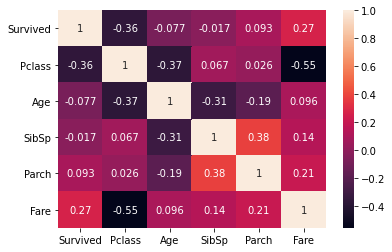

In [7]:
# 6. Use pearson correlation coefficient to find the features between the remaining features from problem 2
sns.heatmap(titanic_intermediary.corr(),annot=True)

In [8]:
# 7. Use mutual info classification to find 4 features between the remaining features from problem 2
mutual = SelectKBest(mutual_info_classif, k=4)

mutual.fit(x, y)

top_features = list(mutual.get_support(indices=True))

feature_list = []
for i in top_features:
    feature_list.append(list(x.columns)[i])
    
feature_list

['Pclass', 'SibSp', 'Parch', 'Fare']

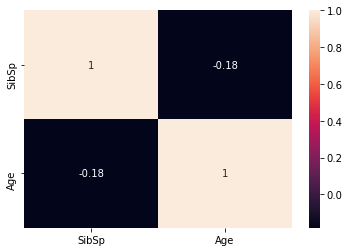

In [9]:
# 8. Use Spearmans rank correlation to calculate features between SibSp and Age
sns.heatmap(titanic_intermediary[['SibSp','Age']].corr(method='spearman'), annot=True)